In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = data[['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',  'FullBath',
       'HalfBath', 'BedroomAbvGr', 'SalePrice']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BsmtFullBath  1460 non-null   int64
 2   BsmtHalfBath  1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [5]:
data.describe()

,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [6]:
data.columns

Index(['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'SalePrice'],
      dtype='object')

C:\Users\valan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


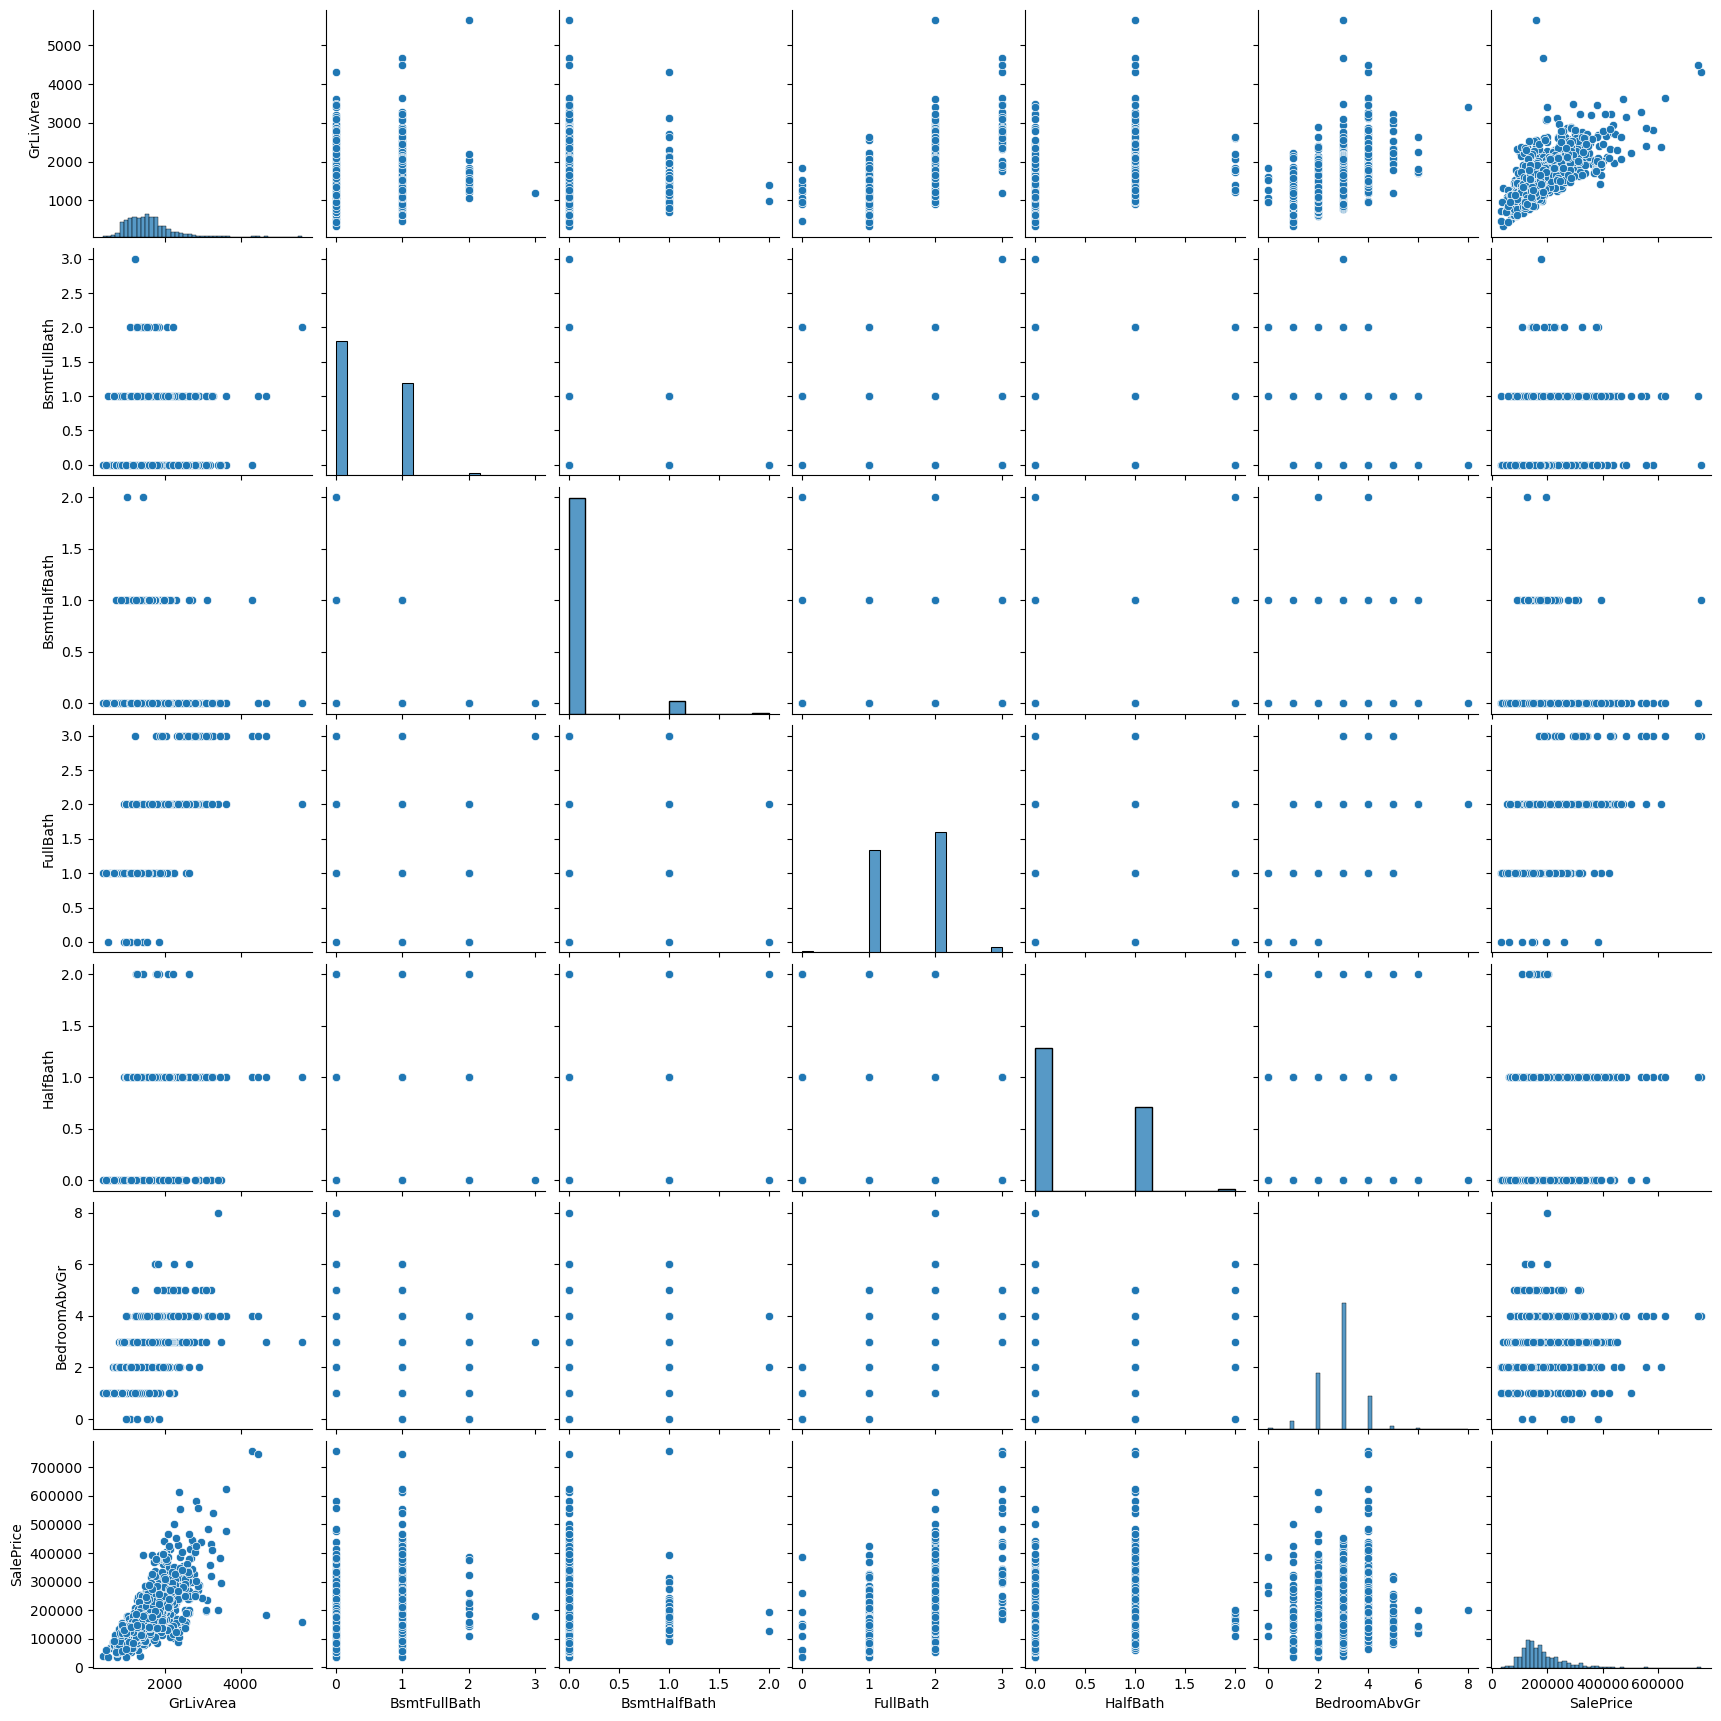

In [8]:
sns.pairplot(data)

<Axes: >

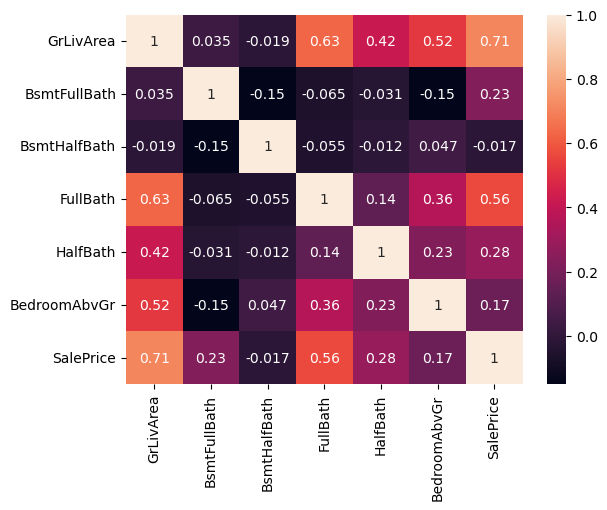

In [11]:
sns.heatmap(data.corr(), annot = True)

In [12]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame with features
X = data.drop(['SalePrice'], axis=1)

# Adding a constant column for the intercept
X = sm.add_constant(X)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Feature        VIF
0         const  18.314043
1     GrLivArea   2.421059
2  BsmtFullBath   1.081177
3  BsmtHalfBath   1.030385
4      FullBath   1.750630
5      HalfBath   1.255830
6  BedroomAbvGr   1.432999


In [17]:
X = data[['GrLivArea','FullBath','BsmtFullBath', 'BsmtHalfBath', 'HalfBath','BedroomAbvGr']]
y = data['SalePrice']

Best Mean Squared Error (MSE): 1906976612.305749
Best R-squared (R2): 0.6766645728569864
Best Mean Absolute Error (MAE): 33023.19028795581
Best Coefficients: [    97.20780552  29407.93682661  18589.18706797  35307.28340312
   6962.66321722 -23188.64952783]


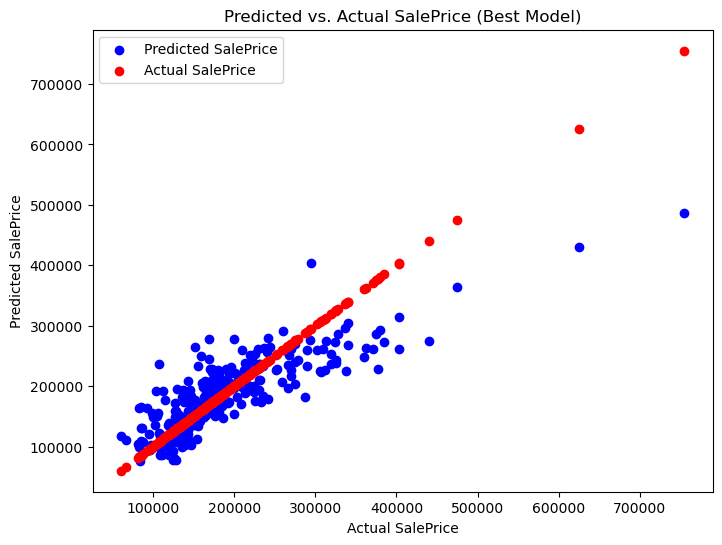

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with features and target variable 'SalePrice'
# Select features (X) and target variable (y) for the linear regression model
X = data.drop(['SalePrice'], axis=1)  # Features
y = data['SalePrice']  # Target variable

# Define the number of iterations for model training
num_iterations = 10
best_mse = float('inf')
best_model = None

for i in range(num_iterations):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) for evaluation
    mse = mean_squared_error(y_test, y_pred)

    # Update best model if current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_model = model

# Calculate R-squared (R2) and Mean Absolute Error (MAE) for the best model
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("Best Mean Squared Error (MSE):", best_mse)
print("Best R-squared (R2):", r2_best)
print("Best Mean Absolute Error (MAE):", mae_best)

# Display coefficients of the best linear regression model
print("Best Coefficients:", best_model.coef_)

# Plot the predicted vs. actual values with different colors for the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, c='blue', label='Predicted SalePrice')  # Predicted values in blue
plt.scatter(y_test, y_test, c='red', label='Actual SalePrice')  # Actual values in red
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs. Actual SalePrice (Best Model)')
plt.legend()
plt.show()


#### Mean Squared Error (MSE): 
The average squared difference between the predicted and actual values is about 1,906,976,612. A lower MSE indicates better model performance.ct.

#### R-squared (R²): 
About 67.67% of the variance in the target variable is explained by the model. This suggests the model fits the data fairly well.

#### Mean Absolute Error (MAE): 
The average absolute difference between the predicted and actual values is approximately 33,023. A lower MAE indicates better model performance.

#### Coefficients: 
These values represent the impact of each feature in the model. Positive coefficients indicate a positive relationship with the target variable, while negative coefficients indicate a negative relationship. For example, the first coefficient (97.21) suggests a slight positive impact, while the sixth coefficient (-23,188.65) suggests a significant negative impact.